# Transfer Learning

Deep convolutional neural network models may take days or even weeks to train on very large datasets.

A way to short-cut this process is to re-use the model weights from pre-trained models that were developed for standard computer vision benchmark datasets, such as the ImageNet image recognition tasks. Top performing models can be downloaded and used directly, or integrated into a new model for your own computer vision problems.

There are perhaps a dozen or more top-performing models for image recognition that can be downloaded and used as the basis for image recognition and related computer vision tasks.

Perhaps three of the more popular models are as follows:

1. VGG (e.g. VGG16 or VGG19).
2. GoogLeNet (e.g. InceptionV3).
3. Residual Network (e.g. ResNet50).
4. Mobile Net

[Read more about available models in Keras](https://keras.io/api/applications/)

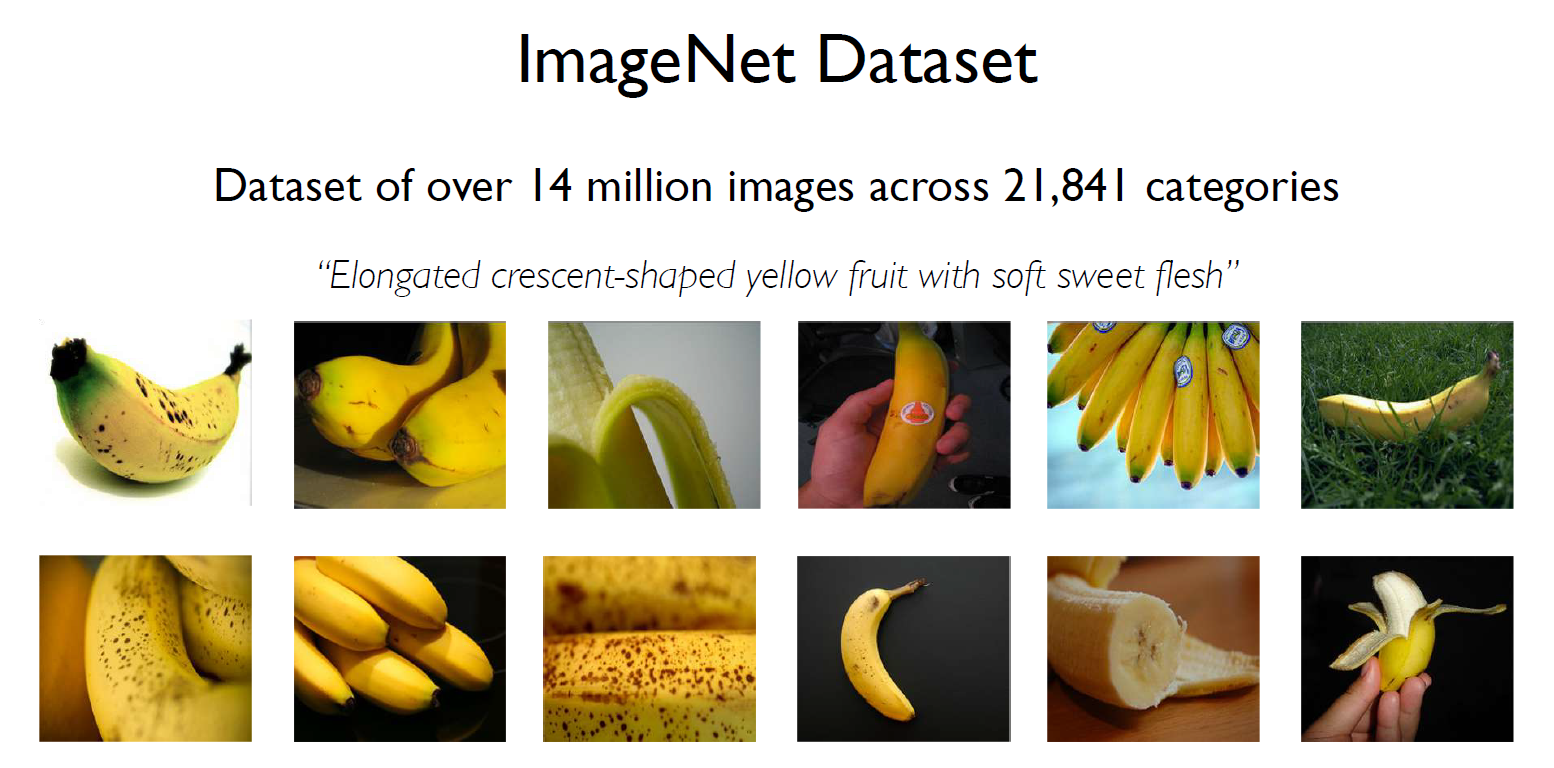

# Mobile Net V2 Architecuture
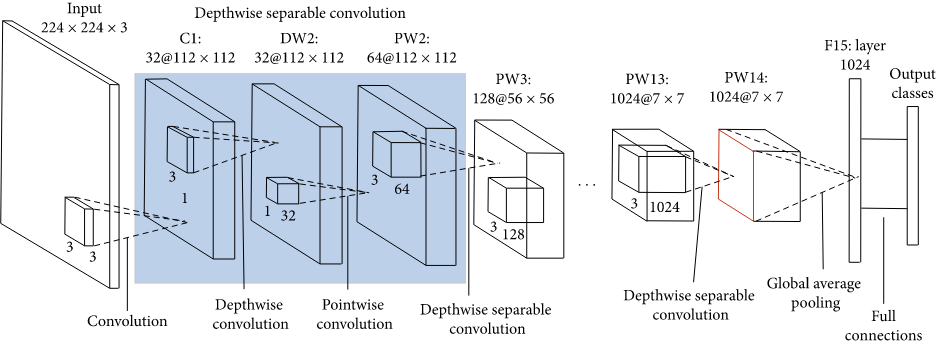

In [2]:
import numpy as np

data=np.load('data-mobile-net.npy')
target=np.load('target-mobile-net.npy')

#loading the save numpy arrays in the previous code

### Convolutional Neural Network Architecture

In [8]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224,224, 3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    
    layer.trainable = False

model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=["accuracy"])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

```By specifying the include_top=False argument, you load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.```
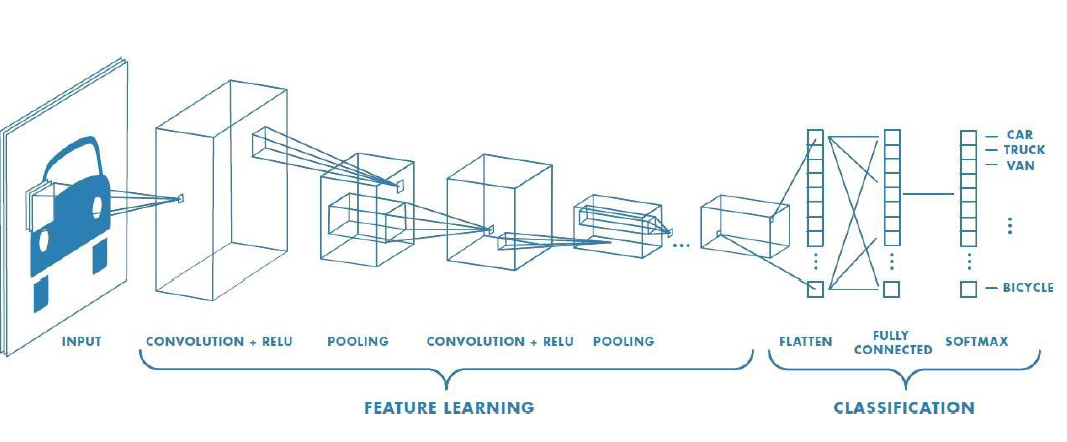

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

### Training the CNN for 10 epochs using train data 

In [4]:
history=model.fit(train_data,train_target,validation_data=(test_data,test_target),epochs=10)

Epoch 1/10
57/57 [==============================] - 37s 618ms/step - loss: 0.3568 - accuracy: 0.8696 - val_loss: 0.1390 - val_accuracy: 0.9450
Epoch 2/10
57/57 [==============================] - 34s 593ms/step - loss: 0.0725 - accuracy: 0.9765 - val_loss: 0.1506 - val_accuracy: 0.9550
Epoch 3/10
57/57 [==============================] - 37s 654ms/step - loss: 0.0934 - accuracy: 0.9661 - val_loss: 0.0897 - val_accuracy: 0.9750
Epoch 4/10
57/57 [==============================] - 36s 629ms/step - loss: 0.0554 - accuracy: 0.9825 - val_loss: 0.1058 - val_accuracy: 0.9550
Epoch 5/10
57/57 [==============================] - 35s 613ms/step - loss: 0.0378 - accuracy: 0.9865 - val_loss: 0.1076 - val_accuracy: 0.9600
Epoch 6/10
57/57 [==============================] - 35s 616ms/step - loss: 0.0238 - accuracy: 0.9940 - val_loss: 0.1396 - val_accuracy: 0.9550
Epoch 7/10
57/57 [==============================] - 34s 592ms/step - loss: 0.0185 - accuracy: 0.9946 - val_loss: 0.1583 - val_accuracy: 0.9550

### Visualizing the loss and the accuracy of trained CNN

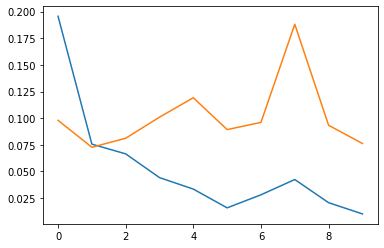

In [10]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

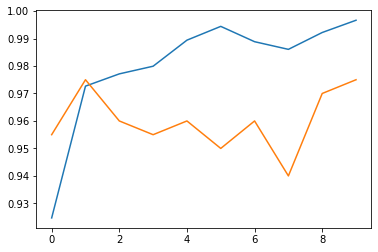

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#if not working replace 'accuracy' with 'acc'

### Evaluating the CNN using testing_data

This returns the loss and the accuracy of the Neural Network for Testing data

In [ ]:
print(model.evaluate(test_data,test_target))